In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [2]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
from sklearn.preprocessing import LabelEncoder 
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [6]:
col=['User ID']
df.drop(col,axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [7]:
X=df[['Gender','Age','EstimatedSalary']]
y=df[['Purchased']]

In [8]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

**Fitting K-NN to the Training set**

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
model=KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Predicting the Test set results**

In [11]:
y_pred=model.predict(X_test)

**Making the Confusion Matrix**

In [12]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score,confusion_matrix,f1_score
c_mat=confusion_matrix(y_test,y_pred)

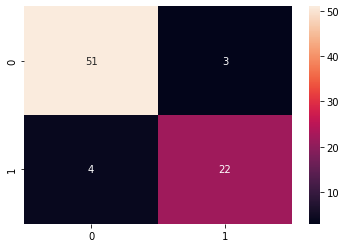

In [13]:
sns.heatmap(c_mat,annot=True)

In [14]:
model.score(X_test,y_test)

0.9125

In [15]:
f1_score(y_test,y_pred)

0.8627450980392156

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


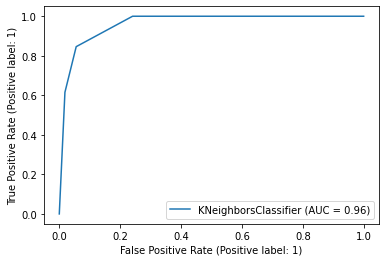

In [16]:
plot_roc_curve(model,X_test,y_test)